Neural Networkを学ぶ
まずはPerceptronからいこうか。

ANDゲートの実装をしてみる

In [1]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [3]:
AND(0,0)

0

In [4]:
AND(1,0)

0

In [5]:
AND(0,1)

0

In [6]:
AND(1,1)

1

重みとバイアスを導入してみる

In [11]:
import numpy as np

In [17]:
x = np.array([0,1]) #入力

In [18]:
w=np.array([0.5,0.5]) #重み

In [19]:
b=-0.7#バイアス

In [20]:
w*x

array([ 0. ,  0.5])

In [21]:
np.sum(w*x)

0.5

In [22]:
np.sum(w*x) + b 

-0.19999999999999996

この方式を利用してANDの実装

In [23]:
def AND(x1,x2):
    x=np.array([x1,x2])
    w=np.array([0.5,0.5])
    b=-0.7
    tmp=np.sum(w*x)+b
    if tmp<0:
        return 0
    else:
        return 1

続いてNANDの実装

In [121]:
def NAND(x1,x2):
    x=np.array([x1,x2])
    w=np.array([-0.5,-0.5])#重みとバイアスのみANDと異なる
    b=0.7
    tmp=np.sum(w*x)+b
    if tmp <= 0:
        return 0
    else:
        return 1

ORの実装

In [25]:
def OR(x1,x2):
    x=np.array([x1,x2])
    w=np.array([0.5,0.5]) #重みとバイアスのみANDと異なる
    b=-0.2
    tmp =np.sum(w*x)+b
    if tmp<0:
        return 0
    else:
        return 1

AND、NAND、ORは同じ構造のパーセプトロンであり、違いは重みパラメータだけである。NANDとORゲートの実装においてもANDと異なる箇所は重みとバイアスの値を設定する箇所だけとなる。

<パーセプトロンの限界>　XORゲートについてグラフ化して考察する。今下記のグラフにおいてXORゲートの出力である●と■の点を一本の直線が分断している。

In [113]:
matplotlib inline

In [114]:
import matplotlib.pyplot as plt

In [115]:
pointx=[0,  1]
pointy=[0,  1]
pointx2=[0, 1]
pointy2=[1, 0]

In [116]:
#numpy内のaraneメゾットを活用して値の変域と刻みを設定
z=np.arange(-3,5,0.1)
t=-z+0.5

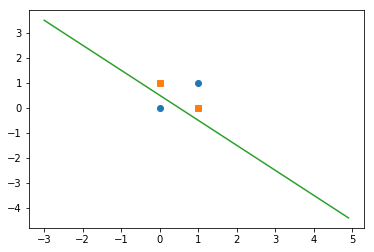

In [117]:
plt.plot(pointx,pointy,'o')
plt.plot(pointx2,pointy2,'s')
plt.plot(z,t)
plt.show()

図で示されるパーセプトロンはy=-x+0.5の直線で分断された2つの領域を表している。
直線の下方は0、上方は1を出力する。パーセプトロンの限界は１本の直線で分けた領域だけしか表現できない点にある。
グラフでは●と■を分けることはできないことが示されている。

しかしパーセプトロンの利点は層を重ねることができる点にある。
単層のパーセプトロンは非線形領域は分離できないが複層にすることでXORゲートの実現は可能である。以下にXORゲートの実装を示す。

In [122]:
def XOR(x1,x2):
    s1=NAND(x1,x2)
    s2=OR(x1,x2)
    y=AND(s1,s2)
    return y

In [123]:
XOR(0,0)

0

In [124]:
XOR(1,0)

1

In [125]:
XOR(0,1)

1

In [126]:
XOR(1,1)

0

このように多層パーセプトロンの実装は行われる。一般的に 単純パーセプトロンは単層のネットワークで活性化関数にステップ関数を使用している。多層パーセプトロンはニューラルネットワークを指すが、これはシグモイド関数など滑らかな活性化関数をしようするネットワークである。

ステップ関数をグラフ表示してみる。

In [3]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x>0,dtype=np.int)

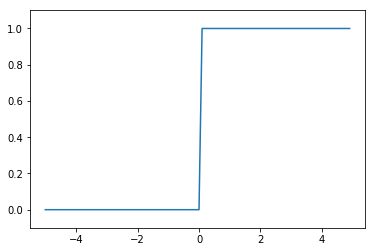

In [4]:
x=np.arange(-5.0, 5.0, 0.1)
y=step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

Sigmoidもグラフに表示してみる。

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

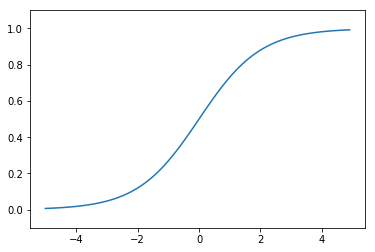

In [7]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

ReLU関数(Rectified Linear Unit)は最近使われているらしい。

In [9]:
def relu(x):
    return np.maximum(0,x)

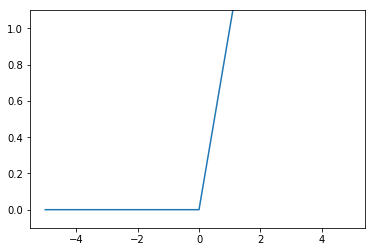

In [10]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

Neural Networkの内積を求める。

In [11]:
x = np.array([1,2])

In [12]:
x.shape

(2,)

In [13]:
w = np.array([[1,3,5],[2,4,6]])

In [14]:
print(w)

[[1 3 5]
 [2 4 6]]


In [15]:
w.shape

(2, 3)

In [16]:
y = np.dot(x,w)

In [17]:
print(y)

[ 5 11 17]


活性化関数について理解したところで3層ニューラルネットワークの実装を行う。 百聞は一見にしかず..やってみる。

In [23]:
def init_network(): #重みとバイアスの初期化を行い、それらをディクショナリに入れる
    network={}
    
    network['w1'] = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]]) #１層目
    network['b1'] = np.array([0.1, 0.2, 0.3])
    
    network['w2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]]) #2層目
    network['b2'] = np.array([0.1, 0.2])
    
    network['w3'] = np.array([[0.1, 0.3],[0.2, 0.4]]) # 3層目
    network['b3'] = np.array([0.1, 0.2])
    
    return network

In [24]:
def identity_function(x): #3層目の活性化関数として形式上実装
    return x

In [29]:
def forward(network, x): #入力信号が出力へと変換されるprocessを実装
    w1, w2, w3 = network['w1'], network['w2'], network['w3'] 
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, w1) + b1#1層目-入力値と重みの内積を求め、バイアスとの和をとる。
    z1 = sigmoid(a1)
    
    a2 = np.dot(z1, w2)  + b2#2層目-z1を入力値とし、同上。
    z2 = sigmoid(a2)
    
    a3 = np.dot(z2, w3) + b3 #3層目-z2を入力値とし、同上。 
    y =  identity_function(a3)
    
    return y
    

3層ニューラルネットワークの実装はこんな感じ。 実行してみる。

In [30]:
network = init_network()
x = np.array([1.0, 0.5])
y=forward(network, x)
print(y) 

[ 0.31682708  0.69627909]
